# Training First Model Using TensorFlow 

<h3>Import Dependancies

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np

/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ritik/anaconda3

<h3> Set up the Training Data

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


<h3> Create the model

<h4>Building a layer

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

<h4>Assemble layers into model

In [4]:
model = tf.keras.Sequential([l0])

<h4>Complie the model, with loss and optimizer function

In [5]:
model.compile(loss = 'mean_squared_error', 
             optimizer = tf.keras.optimizers.Adam(0.1))

<h4>Train the model

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print('Finished training the model')

Finished training the model


<h4>Displaying training statistics

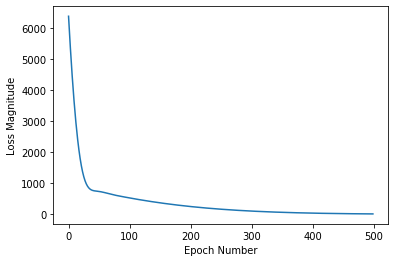

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.show()

<h4>Use the model to predict the values

In [9]:
print(model.predict([100]))

[[211.29047]]


the correct answer is 100*1.8 + 32 = 212.
hence, the model is doing well

<h4>Looking at the layer weights

In [10]:
print('These are the layer variables : {}'.format(l0.get_weights()))

These are the layer variables : [array([[1.8269777]], dtype=float32), array([28.5927], dtype=float32)]


<h4>A little Experiment

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.00183469, -0.4983731 , -0.13623592, -0.49419984]],
      dtype=float32), array([ 2.9543087, -3.4353716,  2.0760221, -3.1863346], dtype=float32)]
These are the l1 variables: [array([[ 0.4179765 ,  1.0823716 , -0.37401342,  0.33649534],
       [-0.009486  , -0.90904367, -0.04971777,  0.82749784],
       [-0.07317545,  0.5415628 , -0.43650484, -0.27539653],
       [-0.91377836, -0.24228354, -0.03500846,  0.8337277 ]],
      dtype=float32), array([ 3.2471132,  3.223999 ,  0.1495908, -3.3482883], dtype=float32)]
These are the l2 variables: [array([[ 0.8010695],
       [ 1.3149834],
       [ 0.1331351],
       [-0.9623276]], dtype=float32), array([3.1832752], dtype=float32)]
